In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
india_ghe_load = "Mean_Temp_IMD_2017.csv"


# Read the international and Canadian GHE data files
indiaghe_data = pd.read_csv(india_ghe_load)

In [10]:
indiaghe_data.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,17.99,19.43,23.49,26.41,28.28,28.60,27.49,26.98,26.26,25.08,21.73,18.95,24.23,18.71,26.06,27.30,21.92
1,1902,19.00,20.39,24.10,26.54,28.68,28.44,27.29,27.05,25.95,24.37,21.33,18.78,24.33,19.70,26.44,27.18,21.49
2,1903,18.32,19.79,22.46,26.03,27.93,28.41,28.04,26.63,26.34,24.57,20.96,18.29,23.80,19.05,25.47,27.17,21.27
3,1904,17.77,19.39,22.95,26.73,27.83,27.85,26.84,26.73,25.84,24.36,21.07,18.84,23.86,18.66,25.84,26.83,21.42
4,1905,17.40,17.79,21.78,24.84,28.32,28.69,27.67,27.47,26.29,26.16,22.07,18.71,23.71,17.58,24.99,27.37,21.48


In [11]:
# Cleaning the international data file

indiaghe = indiaghe_data.loc[:,["YEAR","ANNUAL"]]


indiaghe.head()

,YEAR,ANNUAL
0,1901,24.23
1,1902,24.33
2,1903,23.80
3,1904,23.86
4,1905,23.71


In [14]:
indiaghe.describe()

,YEAR,ANNUAL
count,117.000000,117.000000
mean,1959.000000,24.278718
std,33.919021,0.436950
min,1901.000000,23.560000
25%,1930.000000,24.000000
50%,1959.000000,24.150000
75%,1988.000000,24.460000
max,2017.000000,26.450000


Text(0.5, 0, 'Year')

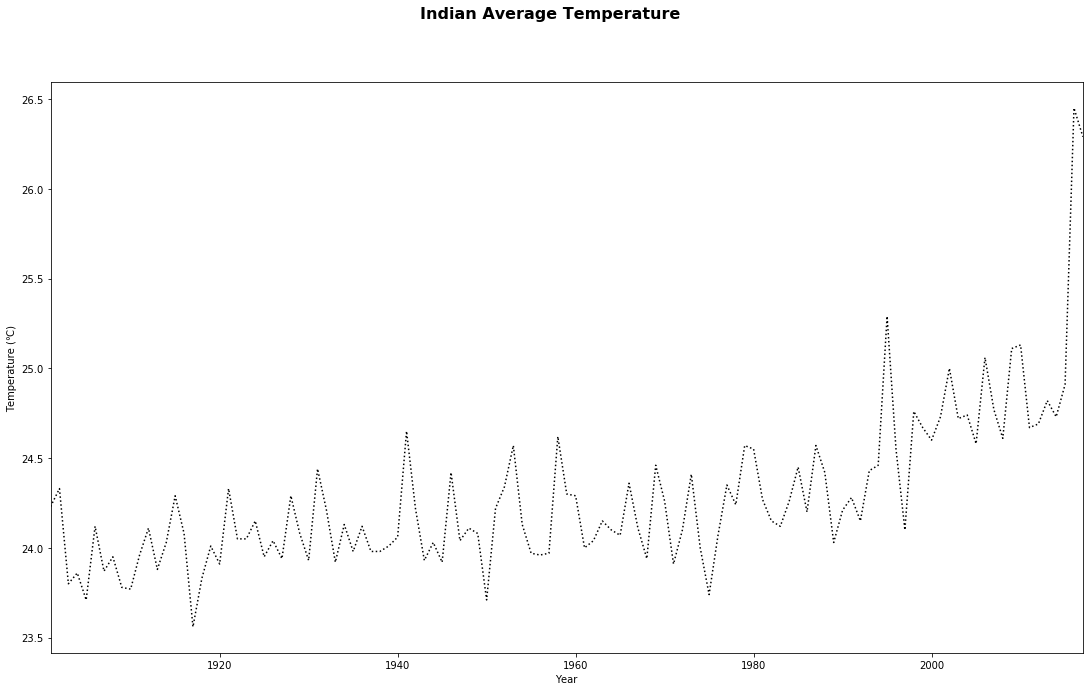

In [18]:
# Plot India mean temperature data

fig, (ax1) = plt.subplots()
fig.set_size_inches(18.5, 10.5)
fig.suptitle("Indian Average Temperature", fontsize=16, fontweight="bold")

ax1.set_xlim(min(indiaghe["YEAR"]), max(indiaghe["YEAR"]))
ax1.plot(indiaghe["YEAR"], indiaghe["ANNUAL"],color="black", 
         linestyle = ":")


ax1.set_ylabel("Temperature (℃)")
ax1.set_xlabel("Year")

In [23]:
# Filtering data set for 30 years (1977 to 2007)

restricted_indiaghe = indiaghe.loc[indiaghe["YEAR"] >= 1977, :]
restricted_indiaghe = indiaghe.loc[indiaghe["YEAR"] < 2008, :]


In [25]:
restricted_indiaghe.describe()

,YEAR,ANNUAL
count,41.000000,41.000000
mean,1997.000000,24.650976
std,11.979149,0.499939
min,1977.000000,24.030000
25%,1987.000000,24.280000
50%,1997.000000,24.580000
75%,2007.000000,24.760000
max,2017.000000,26.450000


In [26]:
baseline = restricted_indiaghe["ANNUAL"].mean()

In [27]:
baseline

24.6509756097561

In [28]:
# Filtering data set for last 10 years

restricted_india = indiaghe.loc[indiaghe["YEAR"] >= 2008, :]
restricted_india.head()

,YEAR,ANNUAL
107,2008,24.61
108,2009,25.11
109,2010,25.13
110,2011,24.67
111,2012,24.69


In [30]:
restricted_india["Baseline"] = baseline
restricted_india.head()

,YEAR,ANNUAL,Baseline
107,2008,24.61,24.650976
108,2009,25.11,24.650976
109,2010,25.13,24.650976
110,2011,24.67,24.650976
111,2012,24.69,24.650976


In [33]:
restricted_india["Difference"]= restricted_india["ANNUAL"]-restricted_india["Baseline"]
restricted_india.head()

,YEAR,ANNUAL,Baseline,Difference
107,2008,24.61,24.650976,-0.040976
108,2009,25.11,24.650976,0.459024
109,2010,25.13,24.650976,0.479024
110,2011,24.67,24.650976,0.019024
111,2012,24.69,24.650976,0.039024


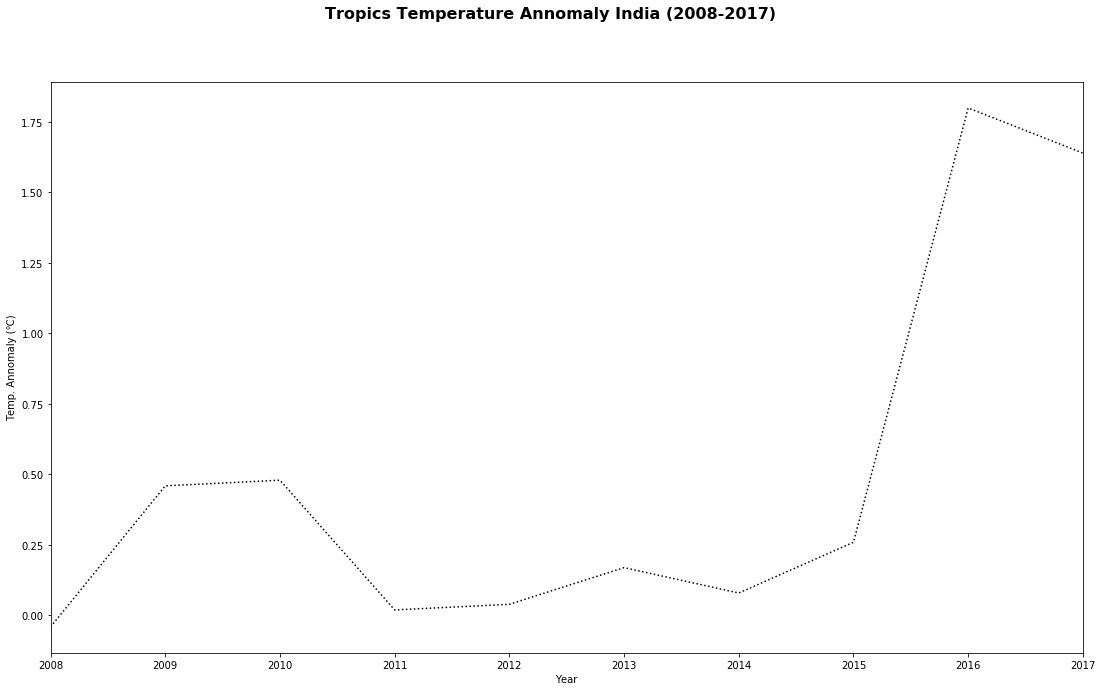

In [38]:
# Plot
fig, (ax1) = plt.subplots()
fig.set_size_inches(18.5, 10.5)
fig.suptitle("Tropics Temperature Annomaly India (2008-2017)", fontsize=16, fontweight="bold")

ax1.set_xlim(min(restricted_india["YEAR"]), max(restricted_india["YEAR"]))
ax1.plot(restricted_india["YEAR"], restricted_india["Difference"],color="black", 
         linestyle = ":")



ax1.set_ylabel("Temp. Annomaly (℃)")
ax1.set_xlabel("Year")

# Save the plot

plt.savefig("India_Temp_Annomaly.png")
